# Text Classification with 20 Newsgroups Dataset using RNN and LSTM

This notebook demonstrates how to perform text classification using both RNN and LSTM models on the 20 Newsgroups dataset.

### Step 1: Install TensorFlow

In [1]:
!pip install tensorflow

### Step 2: Import Libraries

In [2]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Step 3: Load and Preprocess the Dataset

In [3]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Preprocess the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(newsgroups.data)
sequences = tokenizer.texts_to_sequences(newsgroups.data)
X = pad_sequences(sequences, maxlen=200)
y = to_categorical(newsgroups.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Build and Compile the RNN Model

In [4]:
# Build the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
rnn_model.add(SimpleRNN(units=64, return_sequences=False))
rnn_model.add(Dense(20, activation='softmax'))

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Step 5: Build and Compile the LSTM Model

In [7]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
lstm_model.add(LSTM(units=64, return_sequences=False))
lstm_model.add(Dense(20, activation='softmax'))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



### Step 6: Train the RNN Model

In [16]:
# Train the RNN model
history_rnn = rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.1516 - loss: 2.8743 - val_accuracy: 0.3475 - val_loss: 2.3031
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.5810 - loss: 1.7359 - val_accuracy: 0.4344 - val_loss: 1.8874
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.8704 - loss: 0.7744 - val_accuracy: 0.4350 - val_loss: 1.9627
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9630 - loss: 0.3071 - val_accuracy: 0.4718 - val_loss: 1.8849
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9846 - loss: 0.1248 - val_accuracy: 0.4496 - val_loss: 2.0776


### Step 7: Train the LSTM Model

In [8]:
# Train the LSTM model
history_lstm = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.1270 - loss: 2.8301 - val_accuracy: 0.2875 - val_loss: 2.3099
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - accuracy: 0.3528 - loss: 2.0397 - val_accuracy: 0.4831 - val_loss: 1.6286
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 82s 286ms/step - accuracy: 0.5601 - loss: 1.3988 - val_accuracy: 0.5196 - val_loss: 1.4597
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 55s 293ms/step - accuracy: 0.6912 - loss: 1.0190 - val_accuracy: 0.5932 - val_loss: 1.2661
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 58s 306ms/step - accuracy: 0.7628 - loss: 0.7645 - val_accuracy: 0.6011 - val_loss: 1.2826


### Step 8: Evaluate the Models

In [9]:
# Evaluate the RNN model
rnn_eval = rnn_model.evaluate(X_test, y_test, verbose=1)

# Evaluate the LSTM model
lstm_eval = lstm_model.evaluate(X_test, y_test, verbose=1)


118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0526 - loss: 3.0188
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6005 - loss: 1.3140


### Step 9: Plot the Training and Validation Accuracy/Loss

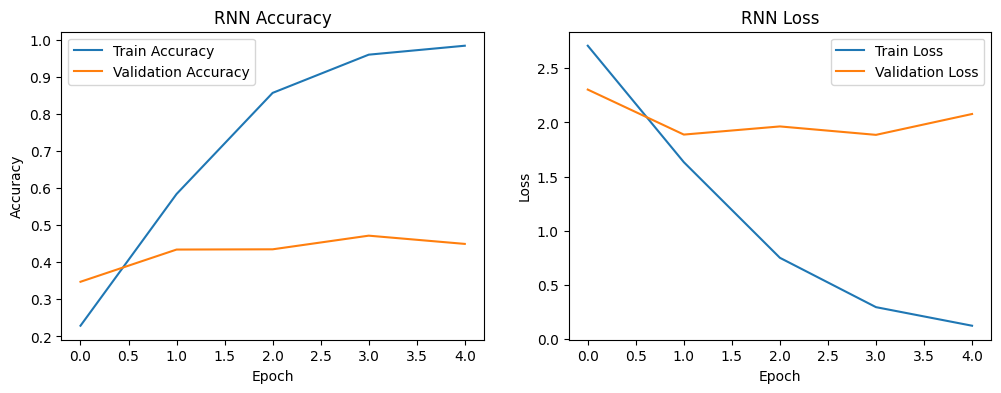

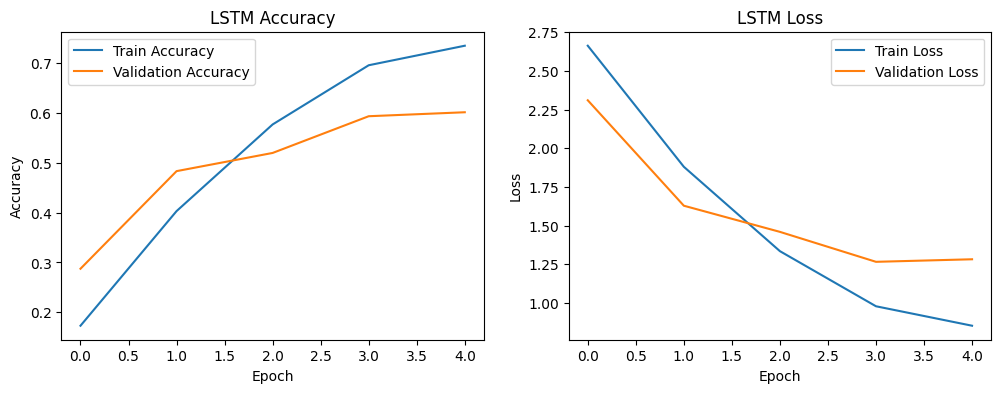

In [18]:
# Plot training & validation accuracy and loss for RNN
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot training & validation accuracy and loss for LSTM
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Step 10: Classify a Sample Text

In [19]:
# Classify a sample text
sample_text = ["Classify"]
sample_sequences = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_sequences, maxlen=200)
prediction_rnn = rnn_model.predict(sample_padded)
prediction_lstm = lstm_model.predict(sample_padded)

print("RNN Prediction:", np.argmax(prediction_rnn))
print("LSTM Prediction:", np.argmax(prediction_lstm))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
RNN Prediction: 19
LSTM Prediction: 9


#**Well done =)**